# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Se cargan los datasets, y se analiza la información de cada dataset, para revisar y conocer la información de manera general, como lo es, el tamaño de los datasets, saber si hay datos faltantes, nulos y duplicados, el tipo de datos de cada columna y conocer si va acorde con el nombre de la columna, saber en qué estado se encuentra la información (es decir, la manera en que se encuentra registrada la información, espacios, mayúsculas, minúsculas, si hay fechas, en que formato se encuentran), qué información se registra en cada una de las columnas. para que de esta manera se pueda pre procesar la información y obtener una base de datos limpia y ordenada, para poder trabajarla y obtener los mejores resultados.

In [57]:
# importar librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames

df_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord_prod = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame

df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame

df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame

df_ord_prod.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Al analizar la información sobre la descripción de los datos, podemos observar que el tamaño de información que se maneja es algo considerable, notamos que hay algunos datos perdidos en algunos datasets, como instacart, products y order_products, sin embargo la cantidad de nulos que hay en cada una de las tablas no es tan considerable, por lo que procesando la información, no afecta en gran medida los resultados, pudiendo trabajar con la información sin mayor afectación.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Se analizarán cada uno de los datasets, para conocer si en efecto se encuentran valores ausentes, saber que tipo de ausentes se encuentran, para poder trabajarlos de la manera más adecuada, así como también saber si se encuentran valores duplicados, imprimir la información de los datasets, para conocer qué información arroja cada una de las columnas, para saber si los tipo de datos son los adecuados, en caso contrario asignar el tipo correcto, saber el estado en que se encuentra registrada la información, para saber si requiere ser tratada. Posteriormente se trabajan estos puntos para limpiar la base de datos y tener oportunidad de analizar la data conforme a los objetivos que se tengan.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(df_instacart['order_id'].duplicated())
print()
print(df_instacart['order_id'].duplicated().sum())
print()
df_instacart[df_instacart['order_id'].duplicated()].sort_values('order_id')

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Name: order_id, Length: 478967, dtype: bool

15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Se encuentra información duplicada, con hallazgos en dos columnas, order_dow, el día de la semana se repite, así como en la columna order_hour_of_day, se repite el dato. Es necesario trabajar estos datos duplicados para contar con una base de registros limpia y ordenada, para llegar al objetivo de los resultados deseados.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

pedidos = (df_instacart[(df_instacart['order_dow'] == 3) & (df_instacart['order_hour_of_day'] == 2)])
print(pedidos.head(20).sort_values('order_id'))

       order_id  user_id  order_number  order_dow  order_hour_of_day  \
29129    353088    46038             4          3                  2   
18420    382357   120200            19          3                  2   
15506    553049    58599            13          3                  2   
74991    592699   175625             2          3                  2   
24691    690242    77357             2          3                  2   
25376   1378085    75705            21          3                  2   
62357   1399416    93151            34          3                  2   
48024   1453300    69262            27          3                  2   
96232   1542137   136709            43          3                  2   
82460   1554296    39743            10          3                  2   
31404   1725788   147843            10          3                  2   
68987   1761462   140562            36          3                  2   
30371   1918001   188546            14          3               

¿Qué sugiere este resultado?

Basándose en el resultado de verificación de los pedidos realizados el día miércoles a las 2:00 am, nos podemos dar cuenta que en efecto se trata de los datos duplicados, teniendo todas en común la información antes mencionada, lo que nos hace ver que probablemente se tuvo un suceso que haya ocasionado el duplicado de dicha información, o bien probablemente, un problema con la identificación del día y hora en el dispositivo mediante el cual se captura la información.

In [10]:
# Elimina los pedidos duplicados

df_instacart = df_instacart.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas

print(df_instacart.duplicated().sum())

0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos

df_instacart['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Al analizar el dataset instacart, en los primeros pasos que es analizar la descripción de los datos e iniciar con el pre procesamiento de la información, para obtener una base de registros limpia, se encontró que hay datos perdidos en una de sus columnas, así como también se encontraron datos duplicados, por lo que fue necesario trabajarlos para dejar la tabla lo más sana posible, primeramente se trabajaron los datos duplicados, llamándolos con el método duplicated mediante order_id, para que arroje la información completamente duplicada. Al obtener la información deseada, se analiza la información para analizar los hallazgos que pueden surgir, para entender el origen de la réplica, si tiene un motivo de ser que sea aceptable, o fue por algún error, y decidir si es conveniente su eliminación. en este caso se eliminaron los duplicados mediante el método drop_duplicates para que no ocasionen torpeza en los resultados, y finalmente se confirma que en efecto los datos duplicados se hayan eliminado sin problema.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

print(df_products.duplicated())
print()
print(df_products.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool

0


In [14]:
# Verifica si hay IDs duplicadas de productos

df_products['product_id'].duplicated().sum()
df_products[df_products['product_id'].duplicated()].sort_values('product_id')

,product_id,product_name,aisle_id,department_id


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name'] = df_products['product_name'].str.upper()

df_products['product_name'].duplicated().sum()
df_products[df_products['product_name'].duplicated()].sort_values('product_name')

,product_id,product_name,aisle_id,department_id
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
9037,9038,AMERICAN CHEESE SLICES,21,16
49530,49531,ANCHOVY FILLETS IN OLIVE OIL,95,15
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [16]:
df_products[df_products['product_name'].str.contains('AGED BALSAMIC VINEGAR OF MODENA',na=False)]

,product_id,product_name,aisle_id,department_id
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13


In [17]:
df_products['product_name'].unique()

array(['CHOCOLATE SANDWICH COOKIES', 'ALL-SEASONS SALT',
       'ROBUST GOLDEN UNSWEETENED OOLONG TEA', ..., 'ARTISAN BAGUETTE',
       'SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD',
       'FRESH FOAMING CLEANSER'], dtype=object)

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes

df_products[df_products['product_name'].duplicated() & df_products['product_name'].isna() == False].sort_values('product_name')

,product_id,product_name,aisle_id,department_id
25772,25773,#2 COFFEE FILTERS,26,7
2157,2158,#2 CONE WHITE COFFEE FILTERS,26,7
26684,26685,#2 MECHANICAL PENCILS,87,17
26380,26381,#4 NATURAL BROWN COFFEE FILTERS,26,7
20603,20604,& GO! HAZELNUT SPREAD + PRETZEL STICKS,88,13
...,...,...,...,...
13816,13817,"\""IM PEI-NUT BUTTER\"" DOUBLE CHOCOLATE COOKIE ...",37,1
44343,44344,"\""LOUIS BA-KAHN\"" CHOCOLATE CHIP COOKIE & BROW...",37,1
25916,25917,"\""MIES VANILLA ROHE\"" ICE CREAM BARS",119,1
45315,45316,"\""MOKACCINO\"" MILK + BLUE BOTTLE COFFEE CHOCOLATE",45,19


El siguiente dataset a analizar es products, en cual se verifica si hay valores duplicados, primeramente se revisa si hay duplicados por medio del id, para saber si hay filas completamente duplicadas, lo cual nos arroja que no existen filas duplicadas, posteriormente procedemos a analizar si hay nombres duplicados, o bien, el mismo nombre pero con detalles distintos, para uniformizar la información. para esto, se pasan los nombres a mayúsculas para que nos arroje la información que se quiere analizar, lo que nos arroja que, la columna product_name, arroja contiene información duplicada, sin embargo, al revisar el product_id de cada nombre de producto, podemos ver que pertenece a diferente producto, por lo tanto, esta información no se elimina. También se pudo observar que en la columna product_name hay valores nulos, que es necesario revisarlos, para trabajar en limpiarlos.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

df_departments.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos

df_departments['department_id'].duplicated().sum()

0

Se analiza el dataset departments, para verificar si se encuentran valores duplicados mediante el método duplicated, lo que nos arroja que la información en la tabla se encuentra completa, sin duplicados, por lo que se mantiene la tabla sin cambio alguno por el momento.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

df_aisles.duplicated().sum()

0

In [22]:
# Revisa si hay IDs duplicadas de productos

df_aisles['aisle_id'].duplicated().sum()

0

Se analiza del dataset aisles, para buscar si hay información duplicada, lo que el método duplicated nos arroja que no se encuentran valores duplicados, por lo que se mantiene la tabla sin cambios por el momento.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas

df_ord_prod.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

df_ord_prod.duplicated(subset=['order_id','product_id','add_to_cart_order']).sum()

0

Se verifica si el dataset order_products cuenta con información duplicada, primeramente se buscan filas totalmente duplicadas, y posteriormente se verifica si no se encuentra algún duplicado en alguna otra columna que pudiera afectar al momento de realizar análisis. Los resultados del método utilizado duplicated nos arroja que no se encuentran filas duplicadas, ni algún otro duplicado, por lo que se mantiene la tabla sin cambios por el momento.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'

df_products['product_name'].isna().sum()
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Como visualizamos en el paso anterior al buscar duplicados, nos pudimos dar cuenta que en la columna product_name se encuentran valores ausentes, ahora nos disponemos a trabajarlos, primeramente se tienen que encontrar todos los valores ausentes y revisar la información para revisar qué distinciones arroja. Para lo que podemos ver, visualizamos que los nombres de producto que se encuentran nulos, tienen similitud en las columnas aisle_id y department_id, los cuales cuentan con el mismo valor en todos los valores ausentes.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_products[df_products['product_name'].isna()]['aisle_id'].unique()

array([100])

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products[df_products['product_name'].isna()]['department_id'].unique()

array([21])

Al revisar las distinciones que arrojaron las líneas de código anterior, se procede a verificar si se encuentra algún otro nombre de producto que pudiera llegar a encontrarse algún valor distinto en la columna department_id, para lo que se busca cuales son todos los valores de department_id para los nombres de producto nulos, lo cual nos arroja que en efecto el departme id que arroja es 21

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(df_aisles[df_aisles['aisle_id'] == 100])
print()
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Posteriormente nos dedicamos a investigar más a fondo sobre la información que contiene cada uno de los registros que nos arrojó donde había valores pérdidos, nos fuimos a los datasets department y aisle para ver los datos que contenían los id's, para lo cual podemos ver que los datos del departamento y del pasillo no se tienen 'missing' por lo que no se sabe que departament y pasillo es al que pertenecen.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('UNKNOWN')
print(df_products.sample(30))

       product_id                                      product_name  aisle_id  \
12615       12616                         CERTIFIED ORGANIC ORANGES       123   
18020       18021             CRUNCHY NO-SALT ROASTED ALMOND BUTTER        88   
27566       27567                        LIQUID COCONUT PREMIUM OIL        25   
22621       22622                         ORGANIC SUNFLOWER KERNELS       117   
14279       14280                                           WIENERS       106   
28721       28722                                    EUCALYPTUS OIL       101   
25336       25337                   WARRIOR BLEND RAW VEGAN PROTEIN        65   
38622       38623                           WILD RICE- 100% NATURAL         4   
5744         5745            BLACK & GREEN TEA- ORGANIC- CHAI- BAGS        94   
47962       47963              WHOLE GRAIN MINI ABC'S & 123'S PASTA        59   
5768         5769                             ORGANIC CHICKEN STOCK        69   
6399         6400           

Al no encontrar información de valor en los datasets department y aisle, y no saber con certeza a donde pertenecen los productos, se decide no eliminarlos pero trabajarlos como desconocidos por lo que se procede a llenar todos los valores pérdidos y renombrarlos con el distintivo 'unknown', para así poder trabajar con ellos y el resto de la información que arroja, la cual puede ser de gran valor.

### `orders` data frame

In [30]:
# Encuentra los valores ausentes

df_instacart.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_instacart.isna().value_counts()

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
                                                               True                       28817
dtype: int64

Se trabaja con el dataset instacart para revisar si se encuentran valores pérdidos en la tabla, mediante el método isna se analiza primero la tabla en general, lo que nos arroja, que se encuentran valores pérdidos únicamente en la columna que arroja los días desde el primer pedido, la cual por el momento no sufre alguna modificación ya que el universo de datos es bastante amplio para obtener información, sin embargo, los datos pérdidos se pudieran trabajar mediante algún método probabilístico para reemplazarlo, o bien reemplazarlo con algún número simbólico, ejemplo 0.



### `order_products` data frame

In [32]:
# Encuentra los valores ausentes

df_ord_prod.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print('El valor mínimo es:', df_ord_prod['add_to_cart_order'].min())
print('El valor máximo es:', df_ord_prod['add_to_cart_order'].max())

El valor mínimo es: 1.0
El valor máximo es: 64.0


Analizamos el dataset order products, para verificar si se encuentran valores perdidos en la tabla, lo que encontramos que únicamente en la columna add to cart order hay valores perdidos, posteriormente, se analiza información que pueda arrojar algún distintivo, por lo que se revisan los valores tanto mínimos y máximos de la columna para revisar los resultados, ya que probablemente se pueda encontrar un detalle de los valores ausentes.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

valores_ausentes = df_ord_prod[df_ord_prod['add_to_cart_order'].isna()]
pedidos_ausentes = valores_ausentes['order_id']
print(pedidos_ausentes.head(10))

737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
34183     844733
57981      61355
58228     936852
62655     264710
64336    1717990
Name: order_id, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

ausentes = df_ord_prod[df_ord_prod['order_id'].isin(pedidos_ausentes)] #filtrar todos los valores ausentes dentro de valores_ausentes
contar_producto = ausentes.groupby('order_id')['product_id'].count().sort_values()
print(contar_producto)

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


Podemos observar que los valores vendidos en add to cart los valores de conteo rebasan el valor máximo, por lo que se puede pensar que probablemente estos carritos no se finiquitaron por completo, es decir, el usuario no terminó de realizar la compra, solo se agregaron al carrito, y puede ser la razón por lo que se convirtieron en valores ausentes al no terminar el proceso.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_ord_prod['add_to_cart_order'] = df_ord_prod['add_to_cart_order'].fillna(999)
df_ord_prod['add_to_cart_order'] = df_ord_prod['add_to_cart_order'].astype(int)
df_ord_prod.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Para poder trabajar con la información de la columna, al detectarse los valores ausentes, y analizarlos, se procede a procesarlos, reemplazando los ausentes con un número simbólico, en este caso '999' mediante el método fillna, así como también al tratarse de una columna que maneja números enteros, se asigna el tipo de datos correcto, entero, ya que contaba con tipo float. de esta manera, se podrán trabajar los números sin que arroje información errónea y/o complicada de leer, y con una tabla limpia, para que arroje los datos lo más certeros posible.

## Conclusiones

Podemos ver que analizar cada una de las tablas es de suma importancia, para poder tener datasets limpios y que arrojen la información adecuada, el preprocesamiento de datos es de los pasos más importantes en un análisis para adquirir información acertada y obtener los resultados deseados y adecuados, ya que si se llega a saltar este paso, o se llega a pasar alguna información puede llegar a ser más complicado en en análisis de los datos, y también arrojar información que no es la adecuada, entorpeciendo los resultados finales, e impidiendo lograr el objetivo deseado. Es importante revisar la información general de la tabla, así como valores nulos y duplicados, el tipo de información que arroja, la manera en que está capturada la información para que el resultado sea exitoso.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
df_instacart['order_hour_of_day'].unique()

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [38]:
df_instacart['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

Es importante verificar que los valores de las columnas sean los adecuados, en este caso en la tabla order hour of day, revisar lo valores no sobre pasen a 23, ya que se trata de las horas, tomando estas en el formato de 24:00 hrs, llevando los valores de 0 a 23, para que arroje la información adecuada, ya que si arroja algún otro valor, estaría tomándose como un valor incorrecto. Es el mismo caso de la columna order dow, la cual señala los días de la semana en valor numérico teniendo como límite del 0 a 6, representando cada número un día de la semana, en caso de arrojar un número diferente, sería un valor erróneo y habría que revisarlo, analizarlo y tratarlo.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<function matplotlib.pyplot.show(close=None, block=None)>

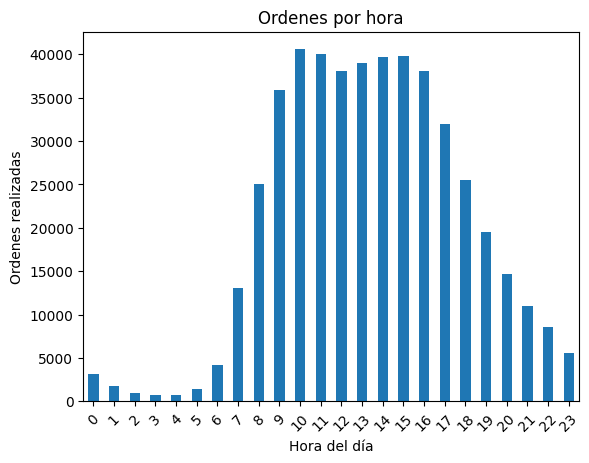

In [39]:
df_pedido_semana = df_instacart.groupby('order_hour_of_day')['user_id'].count()
df_pedido_semana.plot(kind='bar', title='Ordenes por hora', xlabel='Hora del día', ylabel='Ordenes realizadas', rot=45)
plt.show

Podemos ver que durante las primeras horas del día son muy pocas las órdenes realizadas, lo que hace sentido, ya que es de madrugada, miramos que la cantidad empieza a incrementar, llegando a sus puntos máximos entre las 10:00 am y 3:00 y 4:00 pm, lo que podemos pensar que estos pedidos pueden tratarse o bien contener productos como comida rápida, que es cuando la mayoría de la gente toma esas horas para desayunar y comer respectivamente.

### [A3] ¿Qué día de la semana compran víveres las personas?

<function matplotlib.pyplot.show(close=None, block=None)>

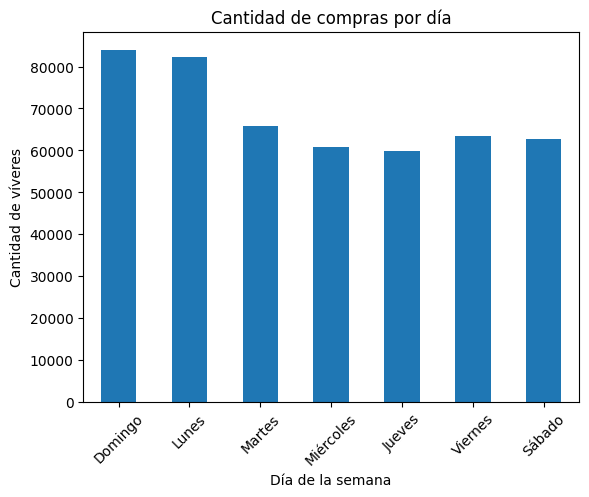

In [40]:
df_pedido_semana = df_instacart.groupby('order_dow')['user_id'].count()
df_pedido_semana.plot(kind='bar', xlabel='Día de la semana', ylabel='Cantidad de víveres', rot=45, title='Cantidad de compras por día')
plt.xticks(ticks = range(7), labels=['Domingo','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado'])
plt.show

Podemos ver que el punto más alto se encuentra en el día domingo, que al tratarse de un día de descanso laboral, deducimos que la gente aprovecha para realizar las compras, así como otras actividades, que se complican en un día laboral, sin embargo, también visualizamos que el día lunes es un punto alto en la gráfica, esto nos puede indicar que la gente puede utilizar tanto un domingo, como lunes, para realizar las compras de la semana completa.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<function matplotlib.pyplot.show(close=None, block=None)>

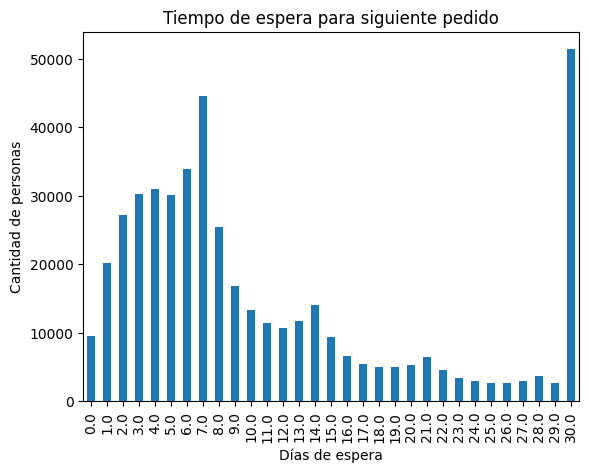

In [41]:
df_proximo_pedido = df_instacart.groupby('days_since_prior_order')['user_id'].count()
df_proximo_pedido.plot(kind='bar', title='Tiempo de espera para siguiente pedido', xlabel='Días de espera', ylabel='Cantidad de personas')
plt.show

Podemos observar que los puntos máximos indican que las personas esperan tanto una semana, como un mes para realizar su siguiente pedido, que es cuando probablemente la gente suele realizar las compras cotidianas, ya sea de manera semanal o mensual, también podemos observar que en los valores mínimos que se acercan a los días 25, 26, 29, que tal vez al ser final de mes, y en ocasiones al estar un poco limitados de efectivo y esperar el día de sueldo, se limiten a realizar compras en esos días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
df_miercoles = df_instacart[df_instacart['order_dow'] == 3]
conteo_miercoles = df_miercoles.groupby('order_hour_of_day')['order_number'].count()
print(conteo_miercoles)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_number, dtype: int64


In [43]:
df_sabado = df_instacart[df_instacart['order_dow'] == 6]
conteo_sabado = df_sabado.groupby('order_hour_of_day')['order_number'].count()
print(conteo_sabado)

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_number, dtype: int64


In [44]:
df_distribucion = pd.concat([conteo_miercoles,conteo_sabado], axis=1)
df_distribucion.columns = ['miercoles', 'sabado']
print(df_distribucion)

                   miercoles  sabado
order_hour_of_day                   
0                        373     464
1                        215     254
2                        106     177
3                        101     125
4                        108     118
5                        170     161
6                        643     451
7                       1732    1619
8                       3125    3246
9                       4490    4311
10                      5026    4919
11                      5004    5116
12                      4688    5132
13                      4674    5323
14                      4774    5375
15                      5163    5188
16                      4976    5029
17                      4175    4295
18                      3463    3338
19                      2652    2610
20                      1917    1847
21                      1450    1473
22                      1154    1185
23                       718     893


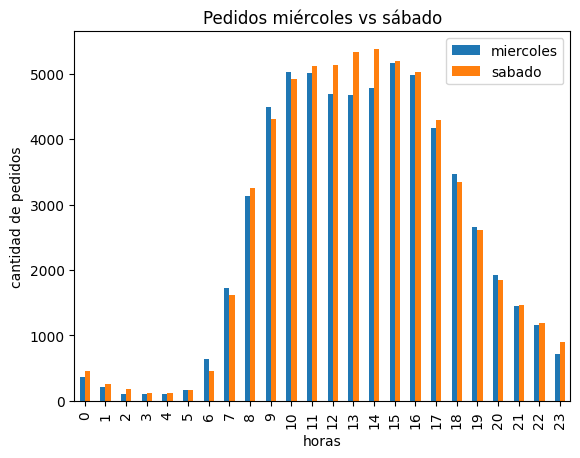

In [45]:
df_distribucion.plot(kind='bar', title='Pedidos miércoles vs sábado', xlabel='horas', ylabel='cantidad de pedidos')
plt.show()

Podemos visualizar que el día miércoles las horas con mayor afluencia se encuentran entre las 10:00 am y 15:00 pm, que es cuando las personas en muchas ocasiones por sus trabajos piden comida rápida ya sea para desayunar o bien para la hora de la comida, esto difiere un poco en el día sábado, que las horas con mayor afluencia son entre la 1:00 y 2:00 pm que al ser fin de semana y la hora de la comida, suelen pedir comida rapida

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

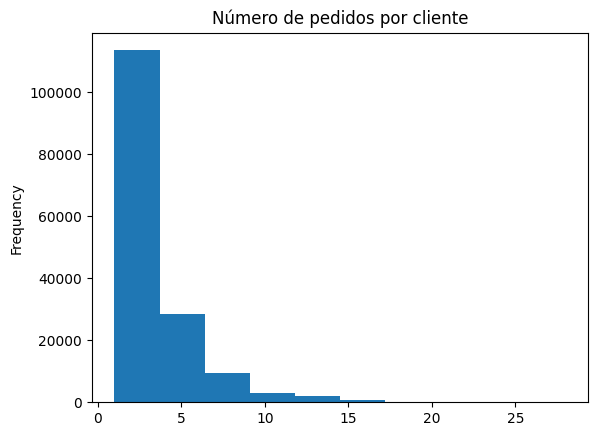

In [46]:
df_proximo_pedido = df_instacart.groupby('user_id')['order_id'].count()
df_proximo_pedido.plot(kind='hist', title='Número de pedidos por cliente') #xlabel='Pedidos', ylabel='Clientes'
plt.show()

Podemos observar que la mayoría de las personas realizan pocos pedidos, menos de 5 pedidos, esto, porque tal vez, aunado a análisis anteriores, las personas realizan pedidos cada cierto tiempo, es decir ya sea de manera semanal o mensual

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
nombre_producto = df_ord_prod.merge(df_products, on='product_id')
nombre_producto

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [48]:
mas_populares = nombre_producto.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).reset_index()
print(mas_populares.head(20))

    product_id              product_name  order_id
0        24852                    BANANA     66050
1        13176    BAG OF ORGANIC BANANAS     53297
2        21137      ORGANIC STRAWBERRIES     37039
3        21903      ORGANIC BABY SPINACH     33971
4        47209      ORGANIC HASS AVOCADO     29773
5        47766           ORGANIC AVOCADO     24689
6        47626               LARGE LEMON     21495
7        16797              STRAWBERRIES     20018
8        26209                     LIMES     19690
9        27845        ORGANIC WHOLE MILK     19600
10       27966       ORGANIC RASPBERRIES     19197
11       22935      ORGANIC YELLOW ONION     15898
12       24964            ORGANIC GARLIC     15292
13       45007          ORGANIC ZUCCHINI     14584
14       39275       ORGANIC BLUEBERRIES     13879
15       49683            CUCUMBER KIRBY     13675
16       28204        ORGANIC FUJI APPLE     12544
17        5876             ORGANIC LEMON     12232
18        8277  APPLE HONEYCRIS

Mediante este análisis podemos observar que los productos más solicitados se encuentran en el área de frutas y verduras, lo que nos muestra que las personas en los pedidos suelen también solicitar productos del super, para realizar sus comidas de la semana o bien del día, aunado a análisis anteriores, en donde nos da a conocer que las personas realizan sus pedidos ya sea de manera semanal o mensual, podemos pensar, que aprovechan para realizar el super con esta frecuencia, y solicitando mayormente los productos mencionados

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
producto_mas_pedido = df_ord_prod.groupby('order_id')['product_id'].count().reset_index()
producto_mas_pedido.sample(10)

,order_id,product_id
316026,2399965,10
133907,1019619,8
416051,3162926,20
354855,2695466,9
307413,2336098,7
102442,780272,8
204587,1555820,1
314712,2390154,1
159661,1216305,11
216385,1645489,16


In [50]:
producto_mas_pedido.describe()

,order_id,product_id
count,4.500460e+05,450046.000000
mean,1.710656e+06,10.098983
std,9.866356e+05,7.540206
min,4.000000e+00,1.000000
25%,8.576508e+05,5.000000
50%,1.710965e+06,8.000000
75%,2.563452e+06,14.000000
max,3.421079e+06,127.000000


Podemos visualizar que la media de productos pedidos se encuentra entre 10 artículos, también observamos que la cantidad mínima de artículos en un pedido es de 1 artículo, y la cantidad máxima en un pedido es de 127 artículos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
frecuencia = nombre_producto.groupby(['product_id','product_name'])['reordered'].sum().reset_index()
frecuencia_ordenada = frecuencia.sort_values('reordered', ascending=False)
frecuencia_ordenada.head(20)

,product_id,product_name,reordered
22808,24852,BANANA,55763
12025,13176,BAG OF ORGANIC BANANAS,44450
19370,21137,ORGANIC STRAWBERRIES,28639
20077,21903,ORGANIC BABY SPINACH,26233
43271,47209,ORGANIC HASS AVOCADO,23629
43788,47766,ORGANIC AVOCADO,18743
25556,27845,ORGANIC WHOLE MILK,16251
43663,47626,LARGE LEMON,15044
25666,27966,ORGANIC RASPBERRIES,14748
15364,16797,STRAWBERRIES,13945


Podemos observar que los productos que mayormente se re-compran se encuentran en el área de frutas y verduras la mayoría, siendo estos artículos de cuando las personas realizan el super, lo que aunado a anteriores análisis nos demuestra que las personas cuando realizan pedidos, ya sea de manera semanal o mensual, tienden a ser artículos de super

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
total_productos = nombre_producto.groupby('product_name')['order_id'].count().reset_index()
total_productos_reorder = nombre_producto.groupby('product_name')['reordered'].sum().reset_index()
proporcion_pedido = total_productos.merge(total_productos_reorder, on='product_name')
proporcion_pedido['proporcion_pedido'] = proporcion_pedido['reordered']/proporcion_pedido['order_id']
proporcion_pedido['recompra'] = 1-proporcion_pedido['proporcion_pedido']
proporcion_pedido

,product_name,order_id,reordered,proporcion_pedido,recompra
0,#2 COFFEE FILTERS,110,28,0.254545,0.745455
1,#2 CONE WHITE COFFEE FILTERS,2,0,0.000000,1.000000
2,#2 MECHANICAL PENCILS,3,0,0.000000,1.000000
3,#4 NATURAL BROWN COFFEE FILTERS,39,14,0.358974,0.641026
4,& GO! HAZELNUT SPREAD + PRETZEL STICKS,15,7,0.466667,0.533333
...,...,...,...,...,...
44513,"\""DARN GOOD\"" CHILI MIX",5,2,0.400000,0.600000
44514,"\""IM PEI-NUT BUTTER\"" DOUBLE CHOCOLATE COOKIE ...",20,8,0.400000,0.600000
44515,"\""LOUIS BA-KAHN\"" CHOCOLATE CHIP COOKIE & BROW...",2,0,0.000000,1.000000
44516,"\""MIES VANILLA ROHE\"" ICE CREAM BARS",8,4,0.500000,0.500000


Mediante este análisis podemos visualizar cuantas veces se piden los artículos y de esos cuantas veces sufre una recompra, visualizando los datos, podemos ver cuáles artículos son los que se se piden con más frecuencia, y se vuelven a pedir, teniendo como pista los datos que nos arroja, podemos ver que los artículos que más se piden y sufren recompra, son producto tipo snack

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
recompra = df_instacart.merge(df_ord_prod, on='order_id')
cliente_recompra = recompra.groupby('user_id')['product_id'].count().reset_index()
total_recompra = recompra.groupby('user_id')['reordered'].sum()
proporcion_pedidos = cliente_recompra.merge(total_recompra, on='user_id')
proporcion_pedidos

,user_id,product_id,reordered
0,2,26,1
1,4,2,0
2,5,12,8
3,6,4,0
4,7,14,13
...,...,...,...
149621,206203,27,6
149622,206206,21,15
149623,206207,46,41
149624,206208,125,87


In [55]:
proporcion_pedidos['proporcion_pedidos'] = proporcion_pedidos['reordered']/proporcion_pedidos['product_id']
proporcion_pedidos

,user_id,product_id,reordered,proporcion_pedidos
0,2,26,1,0.038462
1,4,2,0,0.000000
2,5,12,8,0.666667
3,6,4,0,0.000000
4,7,14,13,0.928571
...,...,...,...,...
149621,206203,27,6,0.222222
149622,206206,21,15,0.714286
149623,206207,46,41,0.891304
149624,206208,125,87,0.696000


Observamos que en pedidos con varios productos la re-compra es más factible, a diferencia de pedidos con pocos productos no suele haber re-compra, o bien es bajo el porcentaje de la re-compra, entre más artículos tenga el pedido más alta es la probabilidad de realizar una recompra, esto puede ser, porque quizá el cliente es más adepto a realizar sus comprar mediante la plataforma.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
primer_pedido = df_ord_prod[df_ord_prod['add_to_cart_order'] == 1]
df_primer_pedido = primer_pedido.groupby('product_id')['order_id'].count().reset_index().sort_values('order_id',ascending=False).head(20)
top20 = df_primer_pedido.merge(df_products, on='product_id')
top20 = top20.drop(['aisle_id','department_id'], axis='columns')
top20

,product_id,order_id,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


Los artículos que las personas seleccionan primero en sus compras, suelen ser productos mayormente del área de frutas y verduras, y productos de tipo super, es decir, cuando las personas van a realizar el súper, así como también leche y refrescos, para productos principalmente para sus alimentos del día, más que alguna otra sección.

### Conclusion general del proyecto:

Realizar un análisis completo sin saltar pasos es de vital importancia, para llegar a los resultados deseados, es decir, cada paso del análisis es muy importante, tanto el análisis de las tablas, para conocer cómo está conformada cada una, y los valores de los registros y tipos de datos, la magnitud de la información, etc, trabajar en el pre procesamiento de datos, es sumamente indispensable para conseguir tablas sanas, limpias, sin valores duplicados, ni nulos, trabajar la manera en que está capturada la información es decir mayúsculas, minúsculas, tipos de formato adecuados es muy importante, para no sesgar, u obtener información errónea, posteriormente el análisis de datos nos podemos dar cuenta de el comportamiento de los datos mediante los diferentes análisis que se pueden realizar, llevándonos a realizar las estrategias adecuadas conforme a los objetivos que se tengan.